# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import numpy as np
import tensorflow as tf

%matplotlib inline


In [2]:
#dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [3]:
#batch size
images_num = 10
#number of files
files_num = 100


#number of rows in plot
num_rows =2
batch = dataset.shuffle(files_num, reshuffle_each_iteration=True).take(images_num)

In [4]:
#display dataset specs
dataset.element_spec

{'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'source_id': TensorSpec(shape=(), dtype=tf.string, name=None),
 'key': TensorSpec(shape=(), dtype=tf.string, name=None),
 'filename': TensorSpec(shape=(), dtype=tf.string, name=None),
 'groundtruth_image_confidences': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'groundtruth_verified_neg_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'groundtruth_not_exhaustive_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'groundtruth_boxes': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None),
 'groundtruth_area': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'groundtruth_is_crowd': TensorSpec(shape=(None,), dtype=tf.bool, name=None),
 'groundtruth_difficult': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'groundtruth_group_of': TensorSpec(shape=(None,), dtype=tf.bool, name=None),
 'groundtruth_weights': TensorSpec(shape=(None,), dtype=tf.float32, name=Non

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
def display_images(batch):
    # TODO - Your implementation here
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    # matching legend lines
    legend_lines = [Line2D([0], [0], color=colormap[1], lw=1, label="vehicles"), 
                    Line2D([0], [0], color=colormap[2], lw=1, label="pedestrians"), 
                    Line2D([0], [0], color=colormap[4], lw=1, label="bicycles")]
    # define rows/cols in figure
    if images_num % num_rows == 0:
        num_cols = images_num // num_rows
    else:
        num_cols = images_num // num_rows + 1
    #print("num_rows:" + str(num_rows) + "  num cols:" +str(num_cols))

    # set up figure
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    fig.suptitle('Observations - Ground Truth Data', fontsize=14)

        ### for each tfrecord in batch...
    for idx, record in enumerate(batch):

        # ...get specs
        img = record["image"].numpy()
        img_shape = record["original_image_spatial_shape"].numpy()
        filename = record["filename"]
        gt_bboxes = record["groundtruth_boxes"].numpy()
        gt_classes = record["groundtruth_classes"].numpy()
        
        #print("idx:" + str(idx))
        if num_rows>1 and num_cols>1:
            # ...get image and put in background
            curr_row = idx // num_cols
            curr_col = idx % num_cols
            #print("curr row:" + str(curr_row) + "  curr col:" + str(curr_col))
            axs[curr_row, curr_col].imshow(img)
            axs[curr_row, curr_col].axis('off')
            # ...add bounding boxes to the foregound
            for box, cl in zip(gt_bboxes, gt_classes):
                # get box coordinates
                y1, x1, y2, x2 = box
                # rescale to image size
                x1, x2 = img_shape[0]*x1, img_shape[0]*x2
                y1, y2 = img_shape[1]*y1, img_shape[1]*y2
                # define rectangle and color with colormap
                rec = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=colormap[cl])
                # add rectangle to plot
                axs[curr_row, curr_col].add_patch(rec)
            # add legend and adjust layout
            axs[num_rows-1,0].legend(handles=legend_lines, loc='center', bbox_to_anchor=(0,-0.2))
        else:
            axs[idx].imshow(img)
            axs[idx].axis('off')
            # ...add bounding boxes to the foregound
            for box, cl in zip(gt_bboxes, gt_classes):
                # get box coordinates
                y1, x1, y2, x2 = box
                # rescale to image size
                x1, x2 = img_shape[0]*x1, img_shape[0]*x2
                y1, y2 = img_shape[1]*y1, img_shape[1]*y2
                # define rectangle and color with colormap
                rec = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=colormap[cl])
                # add rectangle to plot
                axs[idx].add_patch(rec)
            # add legend and adjust layout
            if num_rows == 1:
                axs[0].legend(handles=legend_lines, loc='center', bbox_to_anchor=(0,-0.2))
            else:
                axs[num_rows-1].legend(handles=legend_lines, loc='center', bbox_to_anchor=(0,-0.2))



    plt.tight_layout()

    # display
    plt.show()

    # save figure to png
    fig.savefig('data_exploratory_analysis.png')
    pass
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

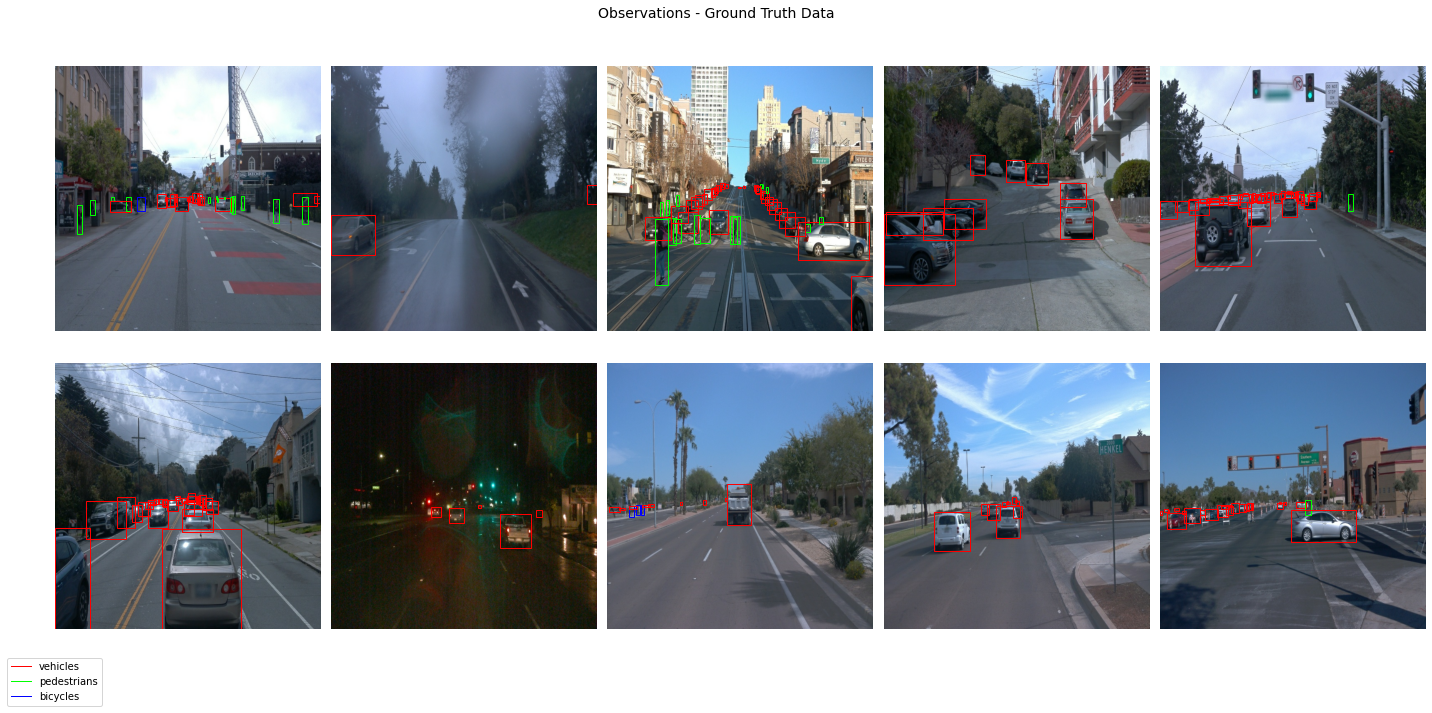

In [6]:
# Display 10 random images in dataset
display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

,vehicles,pedestrians,bicycles,obj_sum,vehicles_per,pedestrians_per,bicycles_per
0,6.0,0.0,0.0,6.0,1.000000,0.000000,0.000000
0,9.0,0.0,0.0,9.0,1.000000,0.000000,0.000000
0,5.0,0.0,0.0,5.0,1.000000,0.000000,0.000000
0,14.0,0.0,0.0,14.0,1.000000,0.000000,0.000000
0,59.0,8.0,0.0,67.0,0.880597,0.119403,0.000000
...,...,...,...,...,...,...,...
0,30.0,18.0,0.0,48.0,0.625000,0.375000,0.000000
0,9.0,0.0,0.0,9.0,1.000000,0.000000,0.000000
0,12.0,22.0,2.0,36.0,0.333333,0.611111,0.055556
0,4.0,0.0,0.0,4.0,1.000000,0.000000,0.000000


,total_number_of_objects,percentage
vehicles,1700.0,0.779102
pedestrians,472.0,0.216315
bicycles,10.0,0.004583


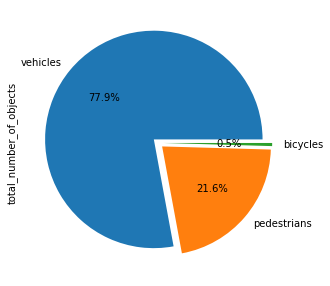

In [7]:
# get number and percentages of objects in each image
import pandas as pd

df = pd.DataFrame(index=[1,2,4])

for cl in dataset.take(100):
    cl_id, counts = np.unique(cl['groundtruth_classes'].numpy(), return_counts=True)
    df_i = pd.DataFrame(index=cl_id, data=counts)
    df = pd.concat([df, df_i], axis=1)


df = df.transpose().rename(columns={1:'vehicles', 2:'pedestrians', 4:'bicycles'})

# sum of all objects in the respective image
df['obj_sum'] = df.sum(axis=1)
# percentages of all objects in respective image
df['vehicles_per'] = df['vehicles']/df['obj_sum']
df['pedestrians_per'] = df['pedestrians']/df['obj_sum']
df['bicycles_per'] = df['bicycles']/df['obj_sum']

df = df.fillna(0.0)

display(df)

df2 = pd.DataFrame()

# total number of objects per type across all given images
df2["total_number_of_objects"] = df[["vehicles", "pedestrians", "bicycles"]].sum()
# percentage of objects per type across all given images
df2["percentage"] = df2["total_number_of_objects"] / df2["total_number_of_objects"].sum()

display(df2)

pieplot = df2["total_number_of_objects"].plot.pie(subplots=True, figsize=(10,5), autopct='%0.1f%%', colors = ['#1f77b4', '#ff7f0e', '#2ca02c'], explode=(0.05, 0.05, 0.05))

# save figure
fig = pieplot[0].get_figure()

fig.savefig('experiments/EDA_pie.png')

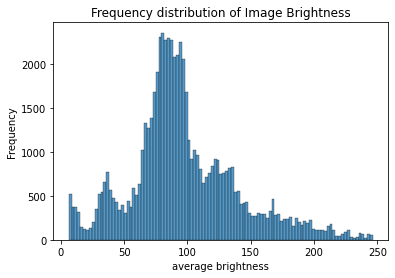

In [8]:
# get distribution of image brightness

import seaborn as sns

from PIL import Image, ImageStat

avg_bright = []
for cl in dataset.take(100):
    for img in cl["image"].numpy():
        image = Image.fromarray(np.uint8(img)).convert('L')
        stat = ImageStat.Stat(image)
        avg = stat.mean[0]
        avg_bright.append(avg)

#histogram plot
brightnessplot = sns.histplot(x=avg_bright)
brightnessplot.set(xlabel = 'average brightness', ylabel='Frequency', title='Frequency distribution of Image Brightness')
fig = brightnessplot.get_figure()
fig.savefig('data_exploratory_analysis_brightness.png') 
#avg_bright